In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Step 1: Prepare the data
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central', 'North', 'South', 'East', 'West', 'Central'],
    'Age': [35, 42, 29, 50, 38, 33, 45, 31, 48, 36],
    'IncomeLevel': [55000, 62000, 48000, 70000, 59000, 53000, 64000, 47000, 68000, 60000],
    'PreferredProduct': ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries',
                         'Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries'],
    'SpendingScore': [70, 85, 60, 90, 75, 68, 88, 58, 92, 77]
}

df = pd.DataFrame(data)

In [5]:
# Step 2: Encode categorical columns (Region and PreferredProduct)
le_region = LabelEncoder()
le_product = LabelEncoder()

df['RegionEncoded'] = le_region.fit_transform(df['Region'])
df['ProductEncoded'] = le_product.fit_transform(df['PreferredProduct'])

In [7]:
# Step 3: Select features for clustering
X = df[['Age', 'IncomeLevel', 'SpendingScore', 'RegionEncoded', 'ProductEncoded']]


In [9]:
# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
# Step 5: Add cluster labels to original DataFrame
df['Cluster'] = kmeans.labels_


In [13]:
# Step 6: View the clustered data
print(df[['Region', 'Age', 'IncomeLevel', 'PreferredProduct', 'SpendingScore', 'Cluster']])

    Region  Age  IncomeLevel PreferredProduct  SpendingScore  Cluster
0    North   35        55000      Electronics             70        1
1    South   42        62000        Groceries             85        2
2     East   29        48000         Clothing             60        1
3     West   50        70000        Furniture             90        0
4  Central   38        59000        Groceries             75        2
5    North   33        53000      Electronics             68        1
6    South   45        64000        Groceries             88        2
7     East   31        47000         Clothing             58        1
8     West   48        68000        Furniture             92        0
9  Central   36        60000        Groceries             77        2


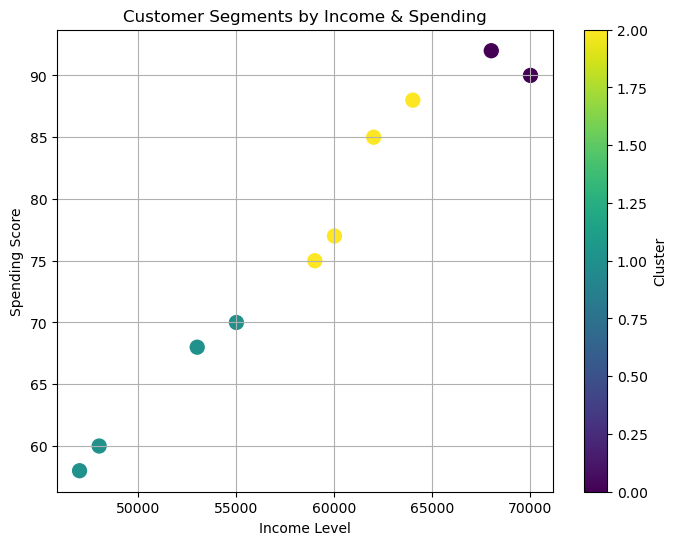

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['IncomeLevel'], df['SpendingScore'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Income Level')
plt.ylabel('Spending Score')
plt.title('Customer Segments by Income & Spending')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()
